In [42]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv('Final.csv')

In [5]:
df

,Unnamed: 0,Year,Quarter,Month,DayofMonth,OriginAirportID,DestAirportID,CRSDepTime,DepTime,DepDelayMinutes,...,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time
0,0,2017,4,12,1,14107,12892,1128,1124.0,0.0,...,0.0,10.0,1015.0,100.0,34.0,12.0,69.0,69.0,28.0,1100.0
1,1,2017,4,12,1,14107,12892,1820,1809.0,0.0,...,0.0,10.0,1013.0,100.0,33.0,8.0,75.0,75.0,21.0,1800.0
2,2,2017,4,12,1,14107,14771,1945,2001.0,16.0,...,0.0,10.0,1014.0,35.0,37.0,4.0,75.0,75.0,25.0,2000.0
3,3,2017,4,12,1,12892,14747,1515,1510.0,0.0,...,0.0,10.0,1015.0,50.0,53.0,16.0,57.0,56.0,85.0,1500.0
4,4,2017,4,12,1,11298,14771,1920,1913.0,0.0,...,0.0,10.0,1019.0,7.0,47.0,15.0,69.0,69.0,46.0,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832247,1877291,2016,1,1,3,13204,13930,1130,1128.0,0.0,...,2.3,8.0,1017.0,100.0,56.0,20.0,61.0,59.0,88.0,1200.0
1832248,1877292,2016,1,1,3,14107,11292,2110,2152.0,42.0,...,0.0,10.0,1013.0,99.0,38.0,27.0,62.0,62.0,42.0,2100.0
1832249,1877293,2016,1,1,3,11292,14107,1830,1928.0,58.0,...,0.0,0.0,1031.0,100.0,24.0,10.0,24.0,20.0,100.0,1900.0
1832250,1877294,2016,1,1,3,13930,13204,925,1039.0,74.0,...,0.0,10.0,1022.0,100.0,21.0,28.0,24.0,12.0,89.0,900.0


In [6]:
df.isnull().sum()

Unnamed: 0         0
Year               0
Quarter            0
Month              0
DayofMonth         0
OriginAirportID    0
DestAirportID      0
CRSDepTime         0
DepTime            0
DepDelayMinutes    0
DepDel15           0
CRSArrTime         0
ArrTime            0
ArrDelayMinutes    0
ArrDel15           0
Time               0
windspeedKmph      0
winddirDegree      0
weatherCode        0
precipMM           0
visibility         0
pressure           0
cloudcover         0
DewPointF          0
WindGustKmph       0
tempF              0
WindChillF         0
humidity           0
time               0
dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayofMonth',
       'OriginAirportID', 'DestAirportID', 'CRSDepTime', 'DepTime',
       'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15', 'Time', 'windspeedKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity', 'time'],
      dtype='object')

In [8]:
df = df.drop(['Unnamed: 0'],axis=1)

In [9]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'OriginAirportID',
       'DestAirportID', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDel15',
       'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'Time',
       'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity', 'time'],
      dtype='object')

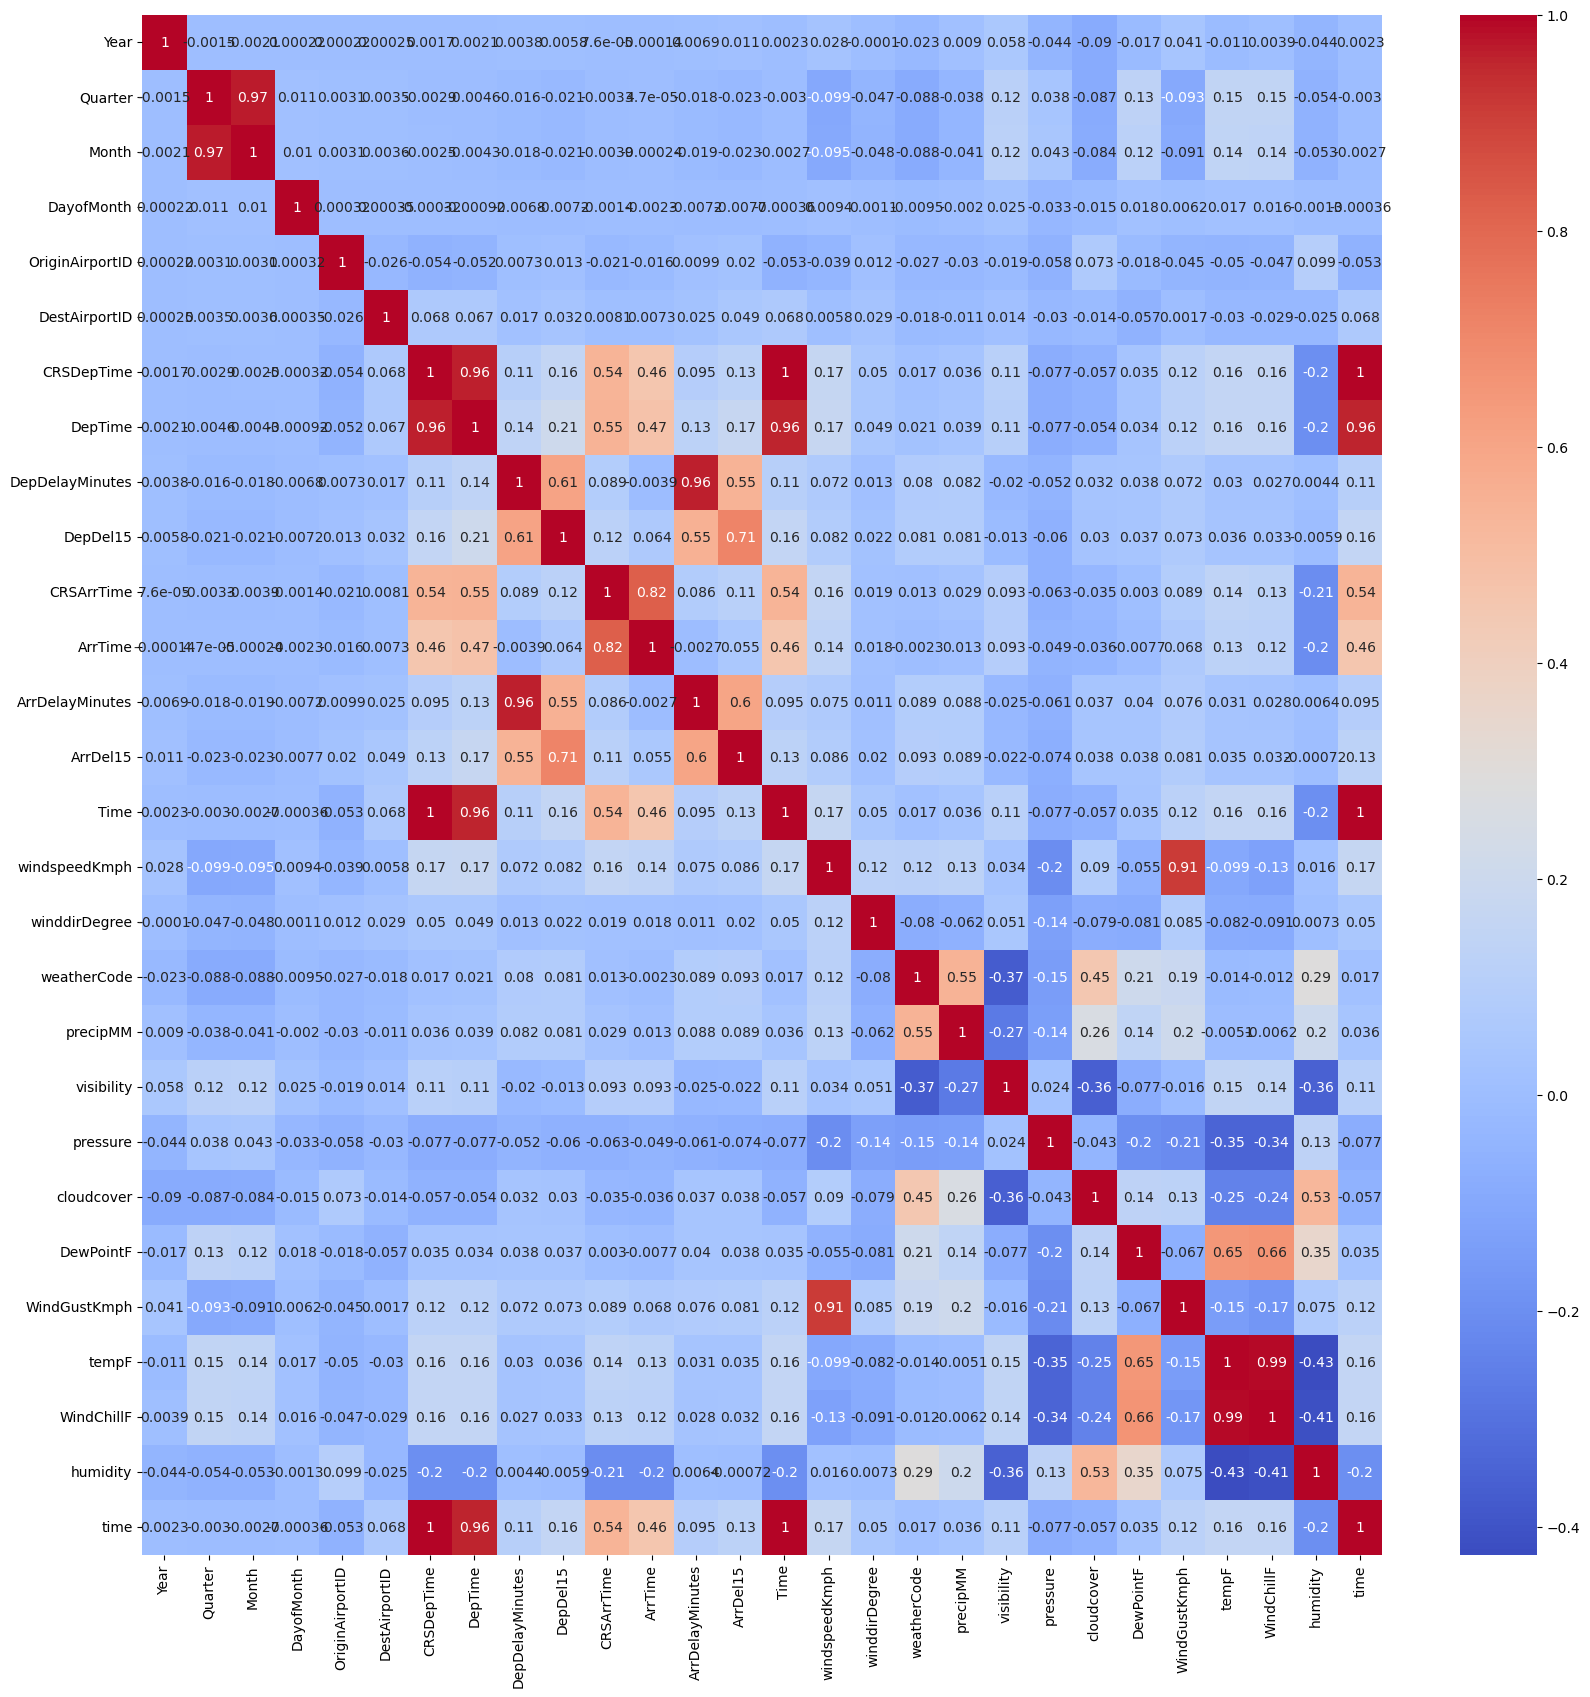

In [10]:
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True,cmap='coolwarm')
plt.show()

In [11]:
df = df.drop(['ArrDelayMinutes','ArrTime','DepTime','time'],axis=1)

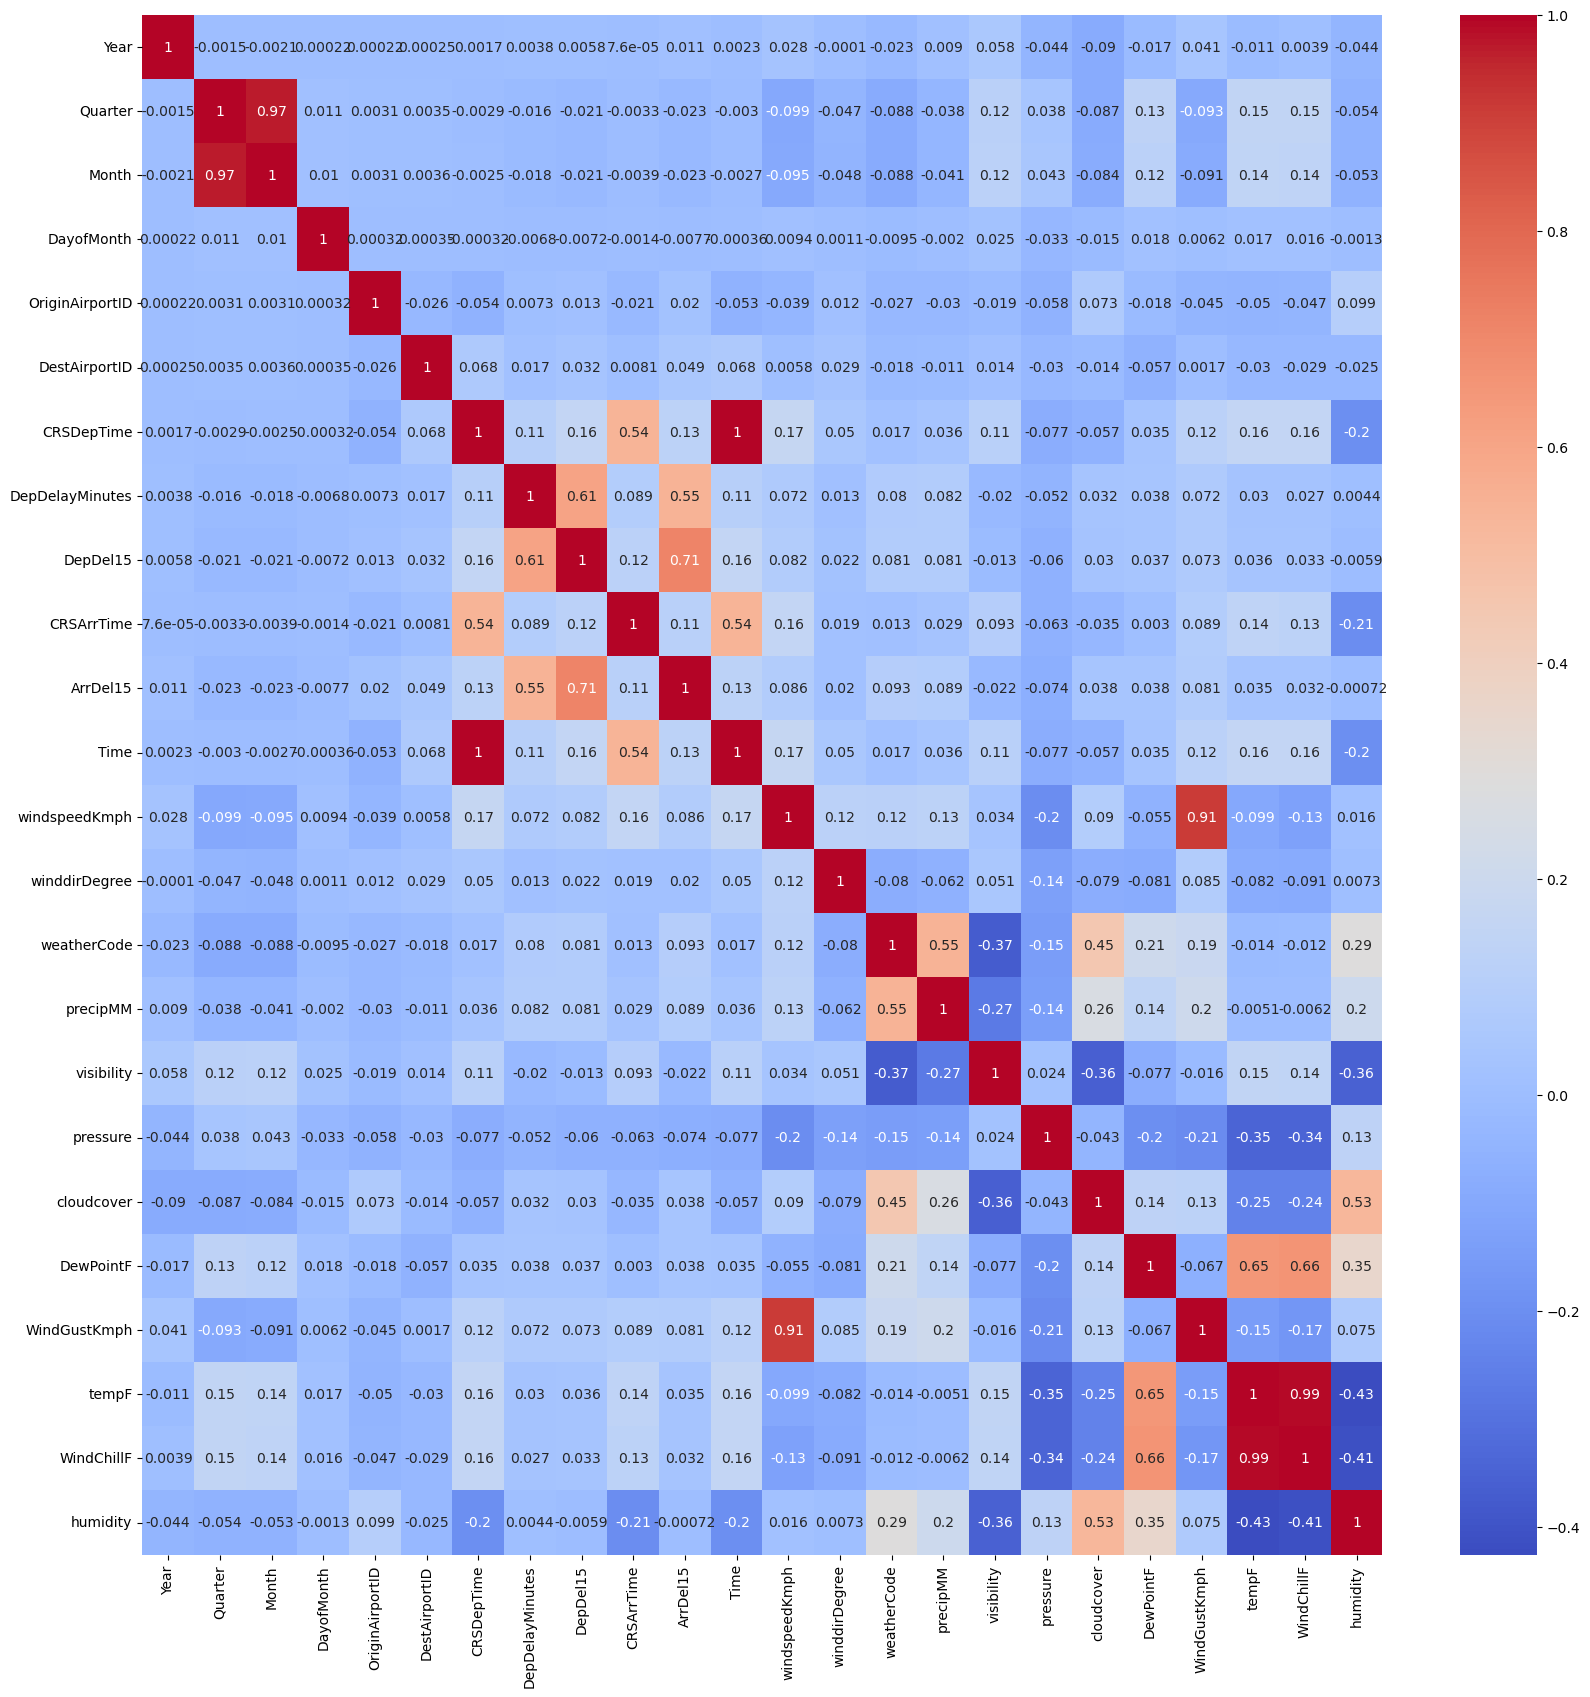

In [12]:
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True,cmap='coolwarm')
plt.show()

In [13]:
df = df.drop(['CRSDepTime','WindGustKmph','tempF','DepDel15'],axis=1)

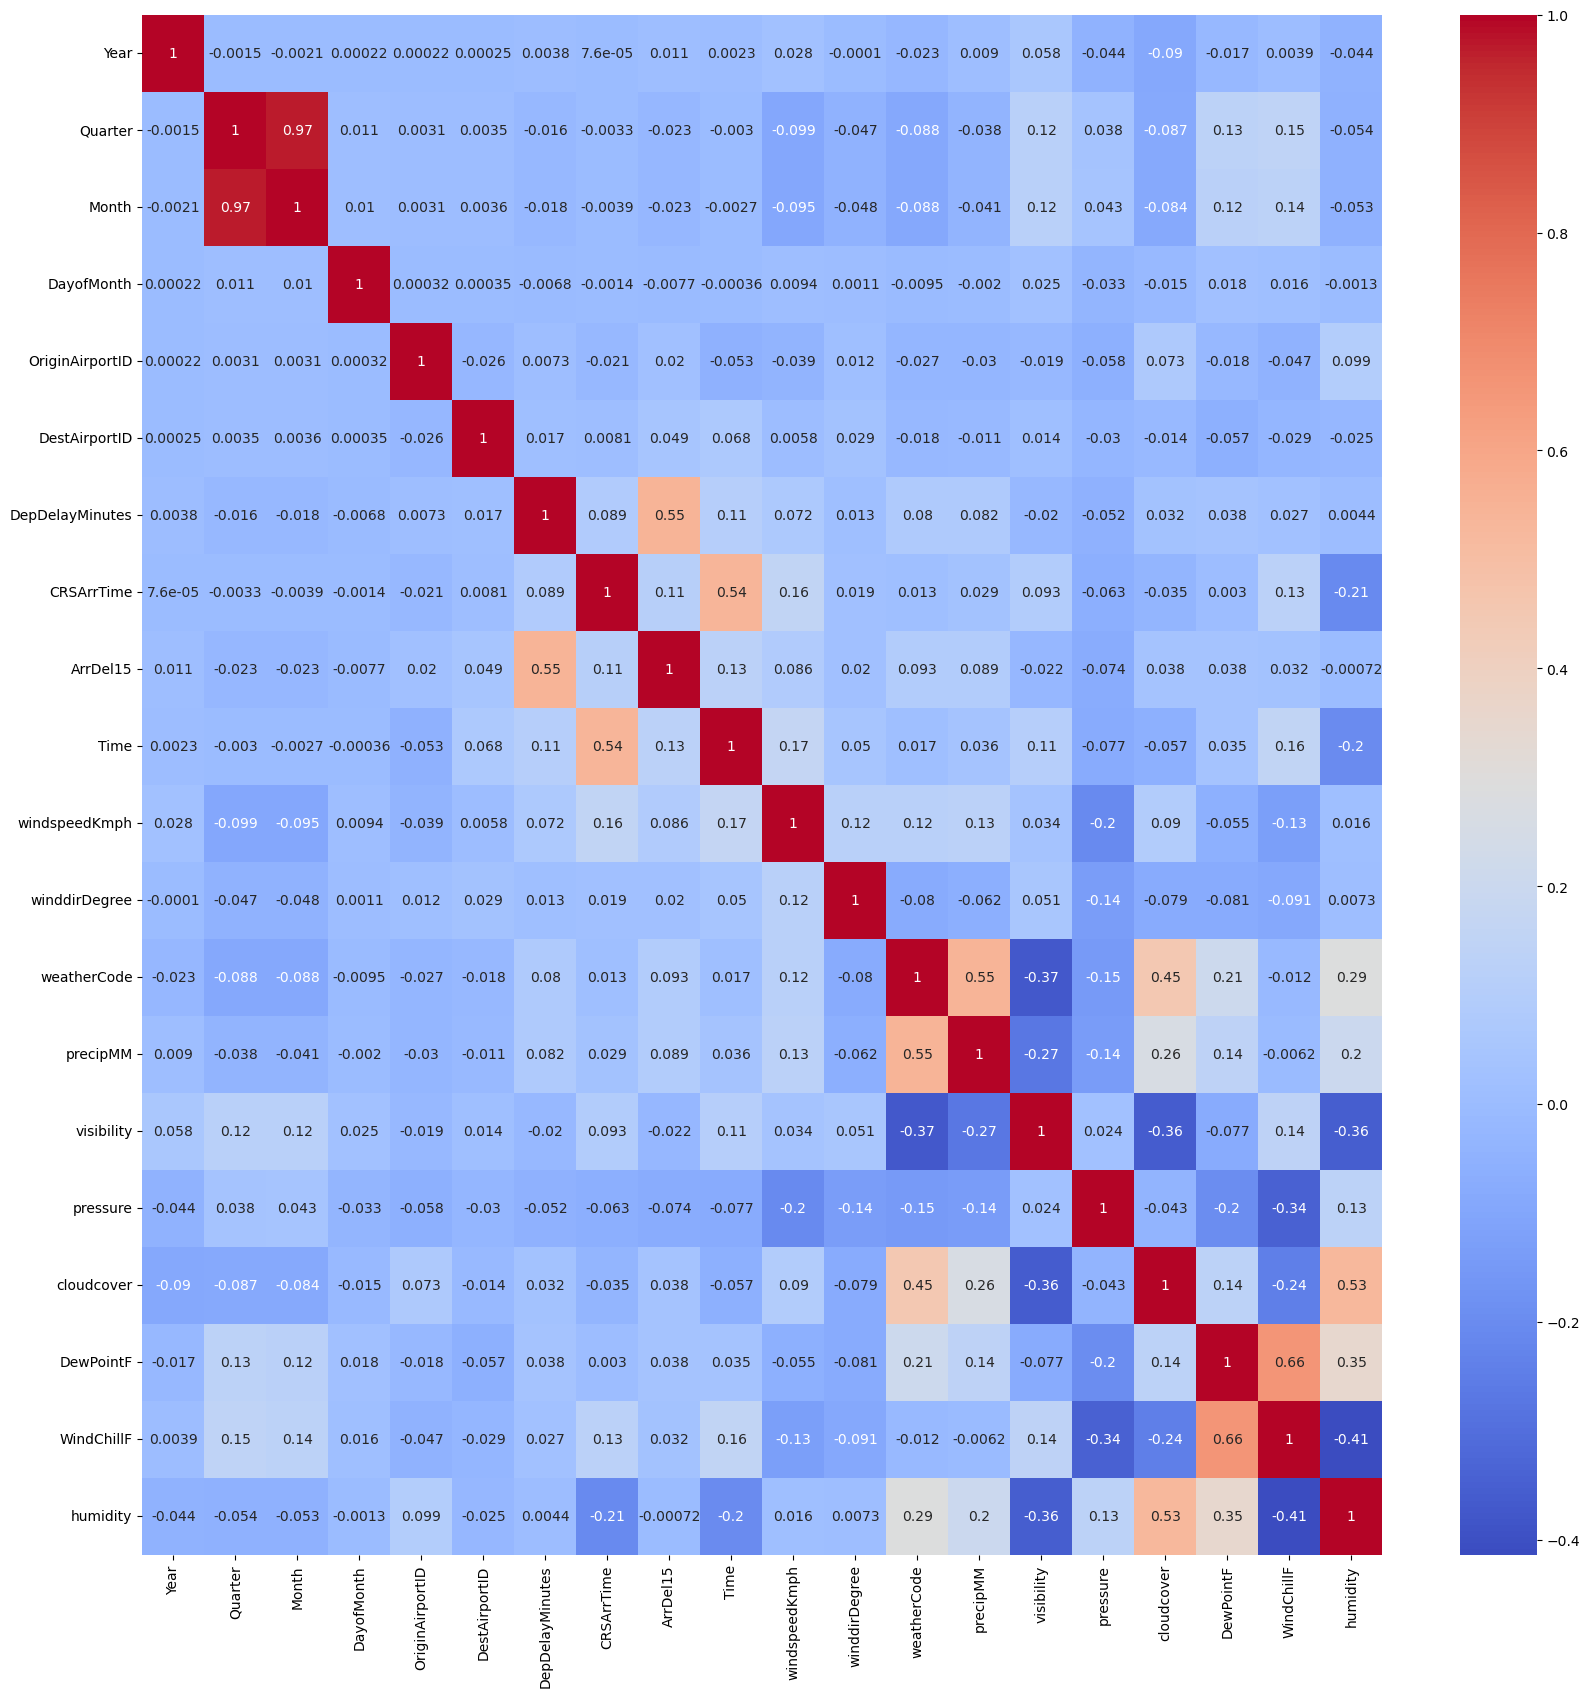

In [14]:
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True,cmap='coolwarm')
plt.show()

In [15]:
df = df.drop(['Quarter'],axis=1)

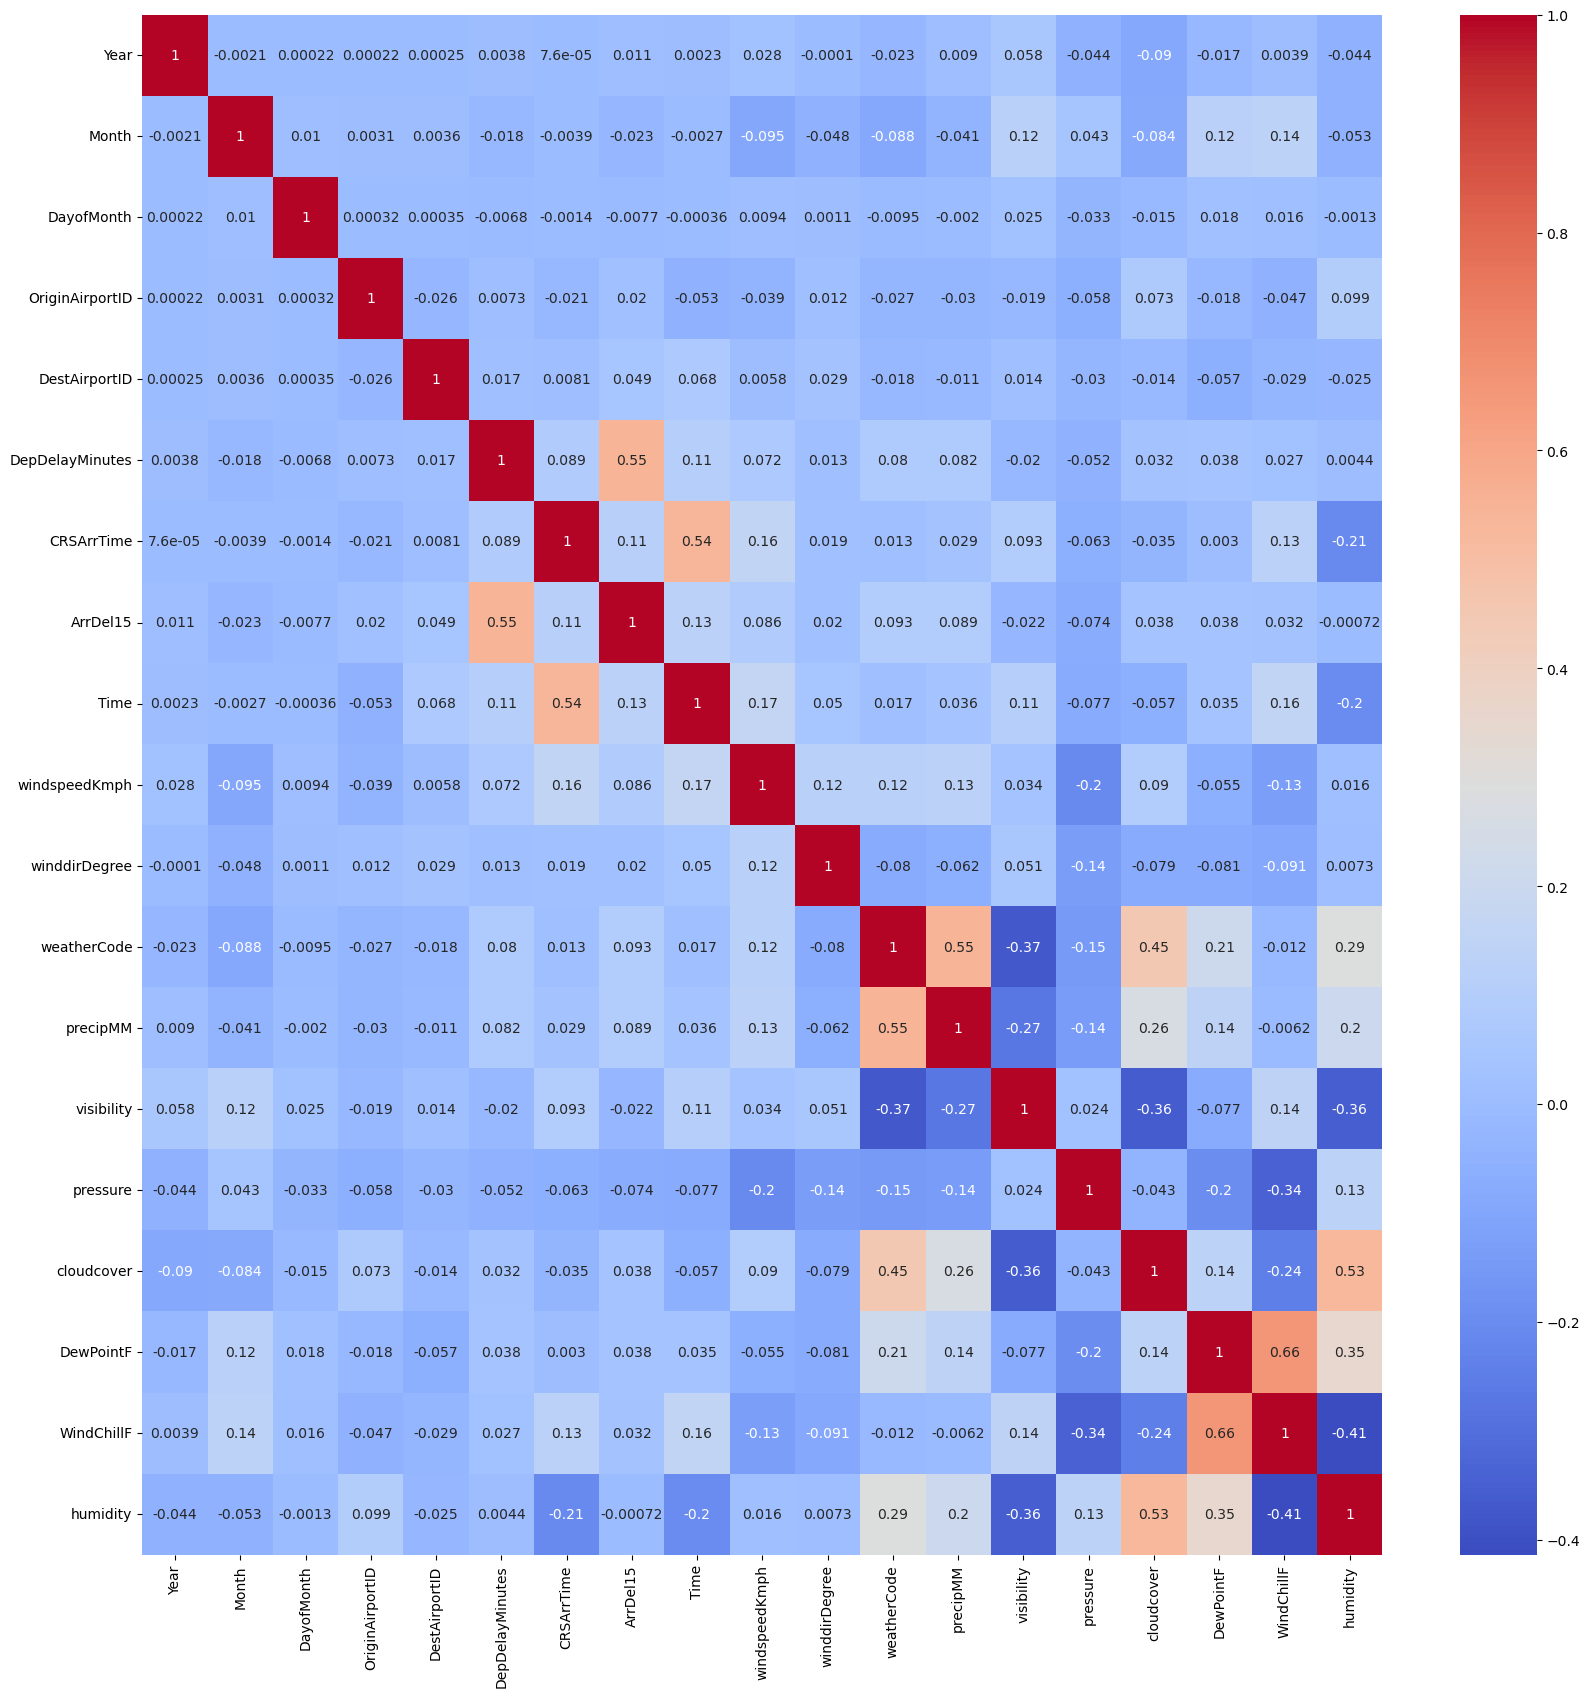

In [16]:
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True,cmap='coolwarm')
plt.show()

In [17]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'OriginAirportID', 'DestAirportID',
       'DepDelayMinutes', 'CRSArrTime', 'ArrDel15', 'Time', 'windspeedKmph',
       'winddirDegree', 'weatherCode', 'precipMM', 'visibility', 'pressure',
       'cloudcover', 'DewPointF', 'WindChillF', 'humidity'],
      dtype='object')

In [18]:
df.shape

(1832252, 19)

In [19]:
weather_columns = [
    'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM', 
    'visibility', 'pressure', 'cloudcover', 'DewPointF', 
    'WindChillF', 'humidity'
]
scaler = MinMaxScaler()
df[weather_columns] = scaler.fit_transform(df[weather_columns])
df.head()

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDel15,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity
0,2017,12,1,14107,12892,0.0,1213,0.0,1100,0.084746,0.216667,0.031915,0.0,0.5,0.500000,1.00,0.505155,0.643836,0.257732
1,2017,12,1,14107,12892,0.0,1852,0.0,1800,0.101695,0.436111,0.031915,0.0,0.5,0.467742,1.00,0.494845,0.684932,0.185567
2,2017,12,1,14107,14771,16.0,2052,0.0,2000,0.050847,0.372222,0.010638,0.0,0.5,0.483871,0.35,0.536082,0.684932,0.226804
3,2017,12,1,12892,14747,0.0,1819,0.0,1500,0.237288,0.661111,0.010638,0.0,0.5,0.500000,0.50,0.701031,0.554795,0.845361
4,2017,12,1,11298,14771,0.0,2133,0.0,1900,0.186441,0.455556,0.010638,0.0,0.5,0.564516,0.07,0.639175,0.643836,0.443299


In [20]:
df

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDel15,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity
0,2017,12,1,14107,12892,0.0,1213,0.0,1100,0.084746,0.216667,0.031915,0.000000,0.5,0.500000,1.00,0.505155,0.643836,0.257732
1,2017,12,1,14107,12892,0.0,1852,0.0,1800,0.101695,0.436111,0.031915,0.000000,0.5,0.467742,1.00,0.494845,0.684932,0.185567
2,2017,12,1,14107,14771,16.0,2052,0.0,2000,0.050847,0.372222,0.010638,0.000000,0.5,0.483871,0.35,0.536082,0.684932,0.226804
3,2017,12,1,12892,14747,0.0,1819,0.0,1500,0.237288,0.661111,0.010638,0.000000,0.5,0.500000,0.50,0.701031,0.554795,0.845361
4,2017,12,1,11298,14771,0.0,2133,0.0,1900,0.186441,0.455556,0.010638,0.000000,0.5,0.564516,0.07,0.639175,0.643836,0.443299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832247,2016,1,3,13204,13930,0.0,1330,0.0,1200,0.271186,0.902778,0.670213,0.075410,0.4,0.532258,1.00,0.731959,0.575342,0.876289
1832248,2016,1,3,14107,11292,42.0,2259,1.0,2100,0.288136,0.211111,0.031915,0.000000,0.5,0.467742,0.99,0.546392,0.595890,0.402062
1832249,2016,1,3,11292,14107,58.0,2024,1.0,1900,0.084746,0.480556,0.521277,0.000000,0.0,0.758065,1.00,0.402062,0.308219,1.000000
1832250,2016,1,3,13930,13204,74.0,1312,1.0,900,0.322034,0.925000,0.031915,0.000000,0.5,0.612903,1.00,0.371134,0.253425,0.886598


In [21]:
df.to_csv('Final_reg.csv')

In [33]:
counts = df['ArrDel15'].value_counts()

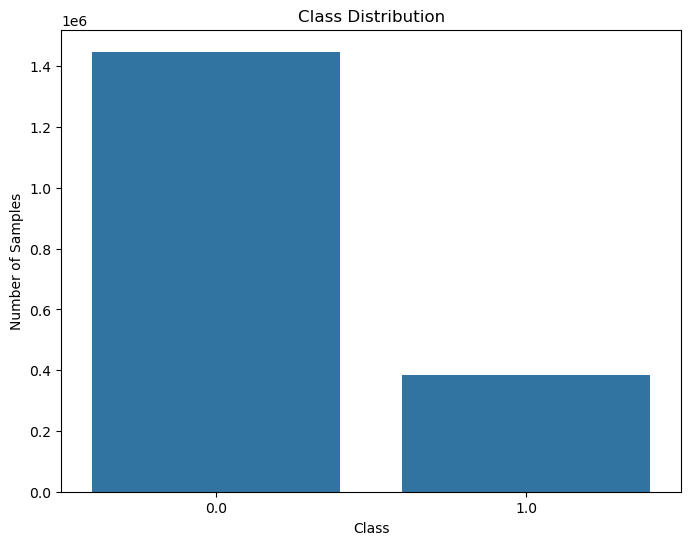

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

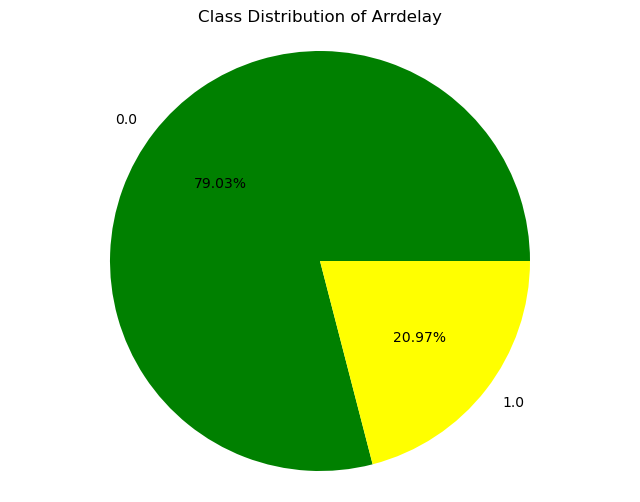

In [35]:
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index,autopct='%1.2f%%',colors=['green','yellow'])
plt.title('Class Distribution of Arrdelay')
plt.axis('equal')
plt.show()

In [25]:
X = df.drop('ArrDel15', axis=1)  
y = df['ArrDel15']  

In [26]:
X

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity
0,2017,12,1,14107,12892,0.0,1213,1100,0.084746,0.216667,0.031915,0.000000,0.5,0.500000,1.00,0.505155,0.643836,0.257732
1,2017,12,1,14107,12892,0.0,1852,1800,0.101695,0.436111,0.031915,0.000000,0.5,0.467742,1.00,0.494845,0.684932,0.185567
2,2017,12,1,14107,14771,16.0,2052,2000,0.050847,0.372222,0.010638,0.000000,0.5,0.483871,0.35,0.536082,0.684932,0.226804
3,2017,12,1,12892,14747,0.0,1819,1500,0.237288,0.661111,0.010638,0.000000,0.5,0.500000,0.50,0.701031,0.554795,0.845361
4,2017,12,1,11298,14771,0.0,2133,1900,0.186441,0.455556,0.010638,0.000000,0.5,0.564516,0.07,0.639175,0.643836,0.443299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832247,2016,1,3,13204,13930,0.0,1330,1200,0.271186,0.902778,0.670213,0.075410,0.4,0.532258,1.00,0.731959,0.575342,0.876289
1832248,2016,1,3,14107,11292,42.0,2259,2100,0.288136,0.211111,0.031915,0.000000,0.5,0.467742,0.99,0.546392,0.595890,0.402062
1832249,2016,1,3,11292,14107,58.0,2024,1900,0.084746,0.480556,0.521277,0.000000,0.0,0.758065,1.00,0.402062,0.308219,1.000000
1832250,2016,1,3,13930,13204,74.0,1312,900,0.322034,0.925000,0.031915,0.000000,0.5,0.612903,1.00,0.371134,0.253425,0.886598


In [27]:
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1832247    0.0
1832248    1.0
1832249    1.0
1832250    1.0
1832251    1.0
Name: ArrDel15, Length: 1832252, dtype: float64

In [77]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [78]:
counts = df['ArrDel15'].value_counts()
counts

ArrDel15
0.0    1448082
1.0     384170
Name: count, dtype: int64

In [79]:
y_train.value_counts()

ArrDel15
0.0    1013657
1.0     268919
Name: count, dtype: int64

In [80]:
LRmodel = LogisticRegression(max_iter = 5000)
LRmodel.fit(X_train,y_train)
LRmodel_pred = LRmodel.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
LRmodel.score(X_test,y_test)

0.9160032455482866

In [82]:
print(classification_report(y_test,LRmodel_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    434425
         1.0       0.89      0.68      0.77    115251

    accuracy                           0.92    549676
   macro avg       0.91      0.83      0.86    549676
weighted avg       0.91      0.92      0.91    549676



In [83]:
print("starting")
ETmodel = ExtraTreesClassifier()
print("running")
ETmodel.fit(X_train, y_train)
print("predicting")
ETmodel_pred = ETmodel.predict(X_test)
print("completed")

starting
running
predicting
completed


In [84]:
ETmodel.score(X_test,y_test)

0.9098032295388556

In [85]:
print(classification_report(y_test,ETmodel_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94    434425
         1.0       0.86      0.69      0.76    115251

    accuracy                           0.91    549676
   macro avg       0.89      0.83      0.85    549676
weighted avg       0.91      0.91      0.91    549676



In [86]:
print("starting")
RFmodel = RandomForestClassifier()
print("running")
RFmodel.fit(X_train,y_train)
print("predicting")
RFmodel_pred = RFmodel.predict(X_test)
print("completed")

starting
running
predicting
completed


In [87]:
RFmodel.score(X_test,y_test)

0.9168037170988

In [88]:
print(classification_report(y_test,RFmodel_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95    434425
         1.0       0.88      0.70      0.78    115251

    accuracy                           0.92    549676
   macro avg       0.90      0.84      0.86    549676
weighted avg       0.91      0.92      0.91    549676



In [89]:
DTmodel = DecisionTreeClassifier(max_depth=12)
print("running")
DTmodel.fit(X_train,y_train)
print("predicting")
DTmodel_pred = DTmodel.predict(X_test)
print("completed")

running
predicting
completed


In [90]:
DTmodel.score(X_test,y_test)

0.9153064714486352

In [91]:
print(classification_report(y_test,DTmodel_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    434425
         1.0       0.89      0.68      0.77    115251

    accuracy                           0.92    549676
   macro avg       0.90      0.83      0.86    549676
weighted avg       0.91      0.92      0.91    549676



In [92]:
XGmodel = XGBClassifier()
print("running")
XGmodel.fit(X_train,y_train)
print("predicting")
XGmodel_pred = XGmodel.predict(X_test)
print("completed")

running
predicting
completed


In [93]:
XGmodel.score(X_test,y_test)

0.919638114089027

In [94]:
print(classification_report(y_test,XGmodel_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    434425
         1.0       0.90      0.69      0.78    115251

    accuracy                           0.92    549676
   macro avg       0.91      0.84      0.87    549676
weighted avg       0.92      0.92      0.92    549676



In [29]:
smote = SMOTE(random_state=10)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [30]:
dfnew = pd.concat([X_train,y_train],axis = 1)

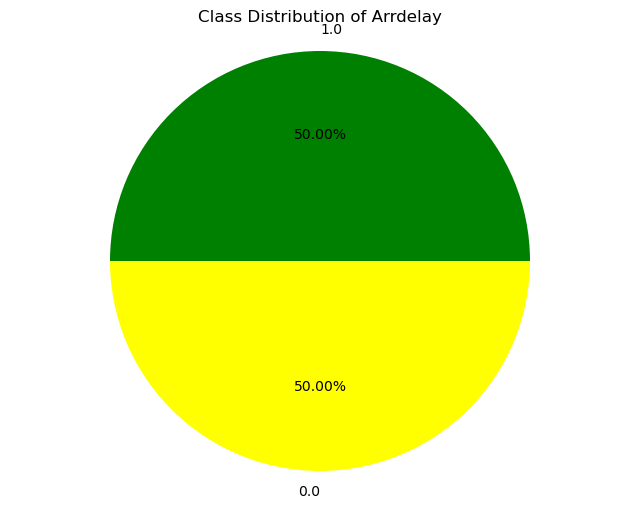

In [31]:
counts = dfnew['ArrDel15'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index,autopct='%1.2f%%',colors=['green','yellow'])
plt.title('Class Distribution of Arrdelay')
plt.axis('equal')
plt.show()

In [36]:
LRmodel = LogisticRegression(max_iter = 5000)
LRmodel.fit(X_train,y_train)
LRmodel_pred = LRmodel.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
LRmodel.score(X_test,y_test)

0.8961570088561261

In [43]:
print(classification_report(y_test,LRmodel_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93    434425
         1.0       0.74      0.78      0.76    115251

    accuracy                           0.90    549676
   macro avg       0.84      0.85      0.85    549676
weighted avg       0.90      0.90      0.90    549676



In [44]:
print("starting")
ETmodel = ExtraTreesClassifier()
print("running")
ETmodel.fit(X_train, y_train)
print("predicting")
ETmodel_pred = ETmodel.predict(X_test)
print("completed")

starting
running
predicting
completed


In [45]:
ETmodel.score(X_test,y_test)

0.9057208246312373

In [48]:
print(classification_report(y_test,ETmodel_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94    434425
         1.0       0.81      0.73      0.76    115251

    accuracy                           0.91    549676
   macro avg       0.87      0.84      0.85    549676
weighted avg       0.90      0.91      0.90    549676



In [46]:
print("starting")
RFmodel = RandomForestClassifier()
print("running")
RFmodel.fit(X_train,y_train)
print("predicting")
RFmodel_pred = RFmodel.predict(X_test)
print("completed")

starting
running
predicting
completed


In [47]:
RFmodel.score(X_test,y_test)

0.9129869232056702

In [49]:
print(classification_report(y_test,RFmodel_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95    434425
         1.0       0.83      0.73      0.78    115251

    accuracy                           0.91    549676
   macro avg       0.88      0.85      0.86    549676
weighted avg       0.91      0.91      0.91    549676



In [50]:
DTmodel = DecisionTreeClassifier(max_depth=12)
print("running")
DTmodel.fit(X_train,y_train)
print("predicting")
DTmodel_pred = DTmodel.predict(X_test)
print("completed")

running
predicting
completed


In [51]:
DTmodel.score(X_test,y_test)

0.9088390251711918

In [52]:
print(classification_report(y_test,DTmodel_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94    434425
         1.0       0.83      0.71      0.77    115251

    accuracy                           0.91    549676
   macro avg       0.88      0.84      0.85    549676
weighted avg       0.91      0.91      0.91    549676



In [53]:
XGmodel = XGBClassifier()
print("running")
XGmodel.fit(X_train,y_train)
print("predicting")
XGmodel_pred = XGmodel.predict(X_test)
print("completed")

running
predicting
completed


In [54]:
XGmodel.score(X_test,y_test)

0.9178425108609435

In [55]:
print(classification_report(y_test,XGmodel_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    434425
         1.0       0.89      0.70      0.78    115251

    accuracy                           0.92    549676
   macro avg       0.90      0.84      0.87    549676
weighted avg       0.92      0.92      0.91    549676



In [97]:
XGmodel.score(X,y)

0.9208313048641781

In [98]:
res = XGmodel.predict(X)

In [99]:
df['pred_del'] = res

In [100]:
df

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDel15,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity,pred_del
0,2017,12,1,14107,12892,0.0,1213,0.0,1100,0.084746,0.216667,0.031915,0.000000,0.5,0.500000,1.00,0.505155,0.643836,0.257732,0
1,2017,12,1,14107,12892,0.0,1852,0.0,1800,0.101695,0.436111,0.031915,0.000000,0.5,0.467742,1.00,0.494845,0.684932,0.185567,0
2,2017,12,1,14107,14771,16.0,2052,0.0,2000,0.050847,0.372222,0.010638,0.000000,0.5,0.483871,0.35,0.536082,0.684932,0.226804,0
3,2017,12,1,12892,14747,0.0,1819,0.0,1500,0.237288,0.661111,0.010638,0.000000,0.5,0.500000,0.50,0.701031,0.554795,0.845361,0
4,2017,12,1,11298,14771,0.0,2133,0.0,1900,0.186441,0.455556,0.010638,0.000000,0.5,0.564516,0.07,0.639175,0.643836,0.443299,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832247,2016,1,3,13204,13930,0.0,1330,0.0,1200,0.271186,0.902778,0.670213,0.075410,0.4,0.532258,1.00,0.731959,0.575342,0.876289,0
1832248,2016,1,3,14107,11292,42.0,2259,1.0,2100,0.288136,0.211111,0.031915,0.000000,0.5,0.467742,0.99,0.546392,0.595890,0.402062,1
1832249,2016,1,3,11292,14107,58.0,2024,1.0,1900,0.084746,0.480556,0.521277,0.000000,0.0,0.758065,1.00,0.402062,0.308219,1.000000,1
1832250,2016,1,3,13930,13204,74.0,1312,1.0,900,0.322034,0.925000,0.031915,0.000000,0.5,0.612903,1.00,0.371134,0.253425,0.886598,1


In [101]:
df['pred_del'] , df['ArrDel15']

(0          0
 1          0
 2          0
 3          0
 4          0
           ..
 1832247    0
 1832248    1
 1832249    1
 1832250    1
 1832251    0
 Name: pred_del, Length: 1832252, dtype: int64,
 0          0.0
 1          0.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 1832247    0.0
 1832248    1.0
 1832249    1.0
 1832250    1.0
 1832251    1.0
 Name: ArrDel15, Length: 1832252, dtype: float64)

In [102]:
df.to_csv('Reg_data.csv')

In [103]:
df1 = pd.read_csv('Final.csv')

In [104]:
df1 = df1.drop(['Unnamed: 0'],axis=1)

In [105]:
df1 = df1.drop(['ArrTime','DepTime','time'],axis=1)

In [106]:
df1 = df1.drop(['CRSDepTime','WindGustKmph','tempF','DepDel15'],axis=1)

In [107]:
df1 = df1.drop(['Quarter'],axis=1)

In [108]:
df1['pred_del'] = res

In [109]:
df1

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDelayMinutes,ArrDel15,Time,...,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity,pred_del
0,2017,12,1,14107,12892,0.0,1213,0.0,0.0,1100,...,78.0,122.0,0.0,10.0,1015.0,100.0,34.0,69.0,28.0,0
1,2017,12,1,14107,12892,0.0,1852,0.0,0.0,1800,...,157.0,122.0,0.0,10.0,1013.0,100.0,33.0,75.0,21.0,0
2,2017,12,1,14107,14771,16.0,2052,13.0,0.0,2000,...,134.0,116.0,0.0,10.0,1014.0,35.0,37.0,75.0,25.0,0
3,2017,12,1,12892,14747,0.0,1819,0.0,0.0,1500,...,238.0,116.0,0.0,10.0,1015.0,50.0,53.0,56.0,85.0,0
4,2017,12,1,11298,14771,0.0,2133,0.0,0.0,1900,...,164.0,116.0,0.0,10.0,1019.0,7.0,47.0,69.0,46.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832247,2016,1,3,13204,13930,0.0,1330,0.0,0.0,1200,...,325.0,302.0,2.3,8.0,1017.0,100.0,56.0,59.0,88.0,0
1832248,2016,1,3,14107,11292,42.0,2259,39.0,1.0,2100,...,76.0,122.0,0.0,10.0,1013.0,99.0,38.0,62.0,42.0,1
1832249,2016,1,3,11292,14107,58.0,2024,53.0,1.0,1900,...,173.0,260.0,0.0,0.0,1031.0,100.0,24.0,20.0,100.0,1
1832250,2016,1,3,13930,13204,74.0,1312,67.0,1.0,900,...,333.0,122.0,0.0,10.0,1022.0,100.0,21.0,12.0,89.0,1


In [110]:
df1 = df1.drop(['ArrDel15'],axis=1)

In [111]:
dftemp = df1
dftemp

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDelayMinutes,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity,pred_del
0,2017,12,1,14107,12892,0.0,1213,0.0,1100,5.0,78.0,122.0,0.0,10.0,1015.0,100.0,34.0,69.0,28.0,0
1,2017,12,1,14107,12892,0.0,1852,0.0,1800,6.0,157.0,122.0,0.0,10.0,1013.0,100.0,33.0,75.0,21.0,0
2,2017,12,1,14107,14771,16.0,2052,13.0,2000,3.0,134.0,116.0,0.0,10.0,1014.0,35.0,37.0,75.0,25.0,0
3,2017,12,1,12892,14747,0.0,1819,0.0,1500,14.0,238.0,116.0,0.0,10.0,1015.0,50.0,53.0,56.0,85.0,0
4,2017,12,1,11298,14771,0.0,2133,0.0,1900,11.0,164.0,116.0,0.0,10.0,1019.0,7.0,47.0,69.0,46.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832247,2016,1,3,13204,13930,0.0,1330,0.0,1200,16.0,325.0,302.0,2.3,8.0,1017.0,100.0,56.0,59.0,88.0,0
1832248,2016,1,3,14107,11292,42.0,2259,39.0,2100,17.0,76.0,122.0,0.0,10.0,1013.0,99.0,38.0,62.0,42.0,1
1832249,2016,1,3,11292,14107,58.0,2024,53.0,1900,5.0,173.0,260.0,0.0,0.0,1031.0,100.0,24.0,20.0,100.0,1
1832250,2016,1,3,13930,13204,74.0,1312,67.0,900,19.0,333.0,122.0,0.0,10.0,1022.0,100.0,21.0,12.0,89.0,1


In [112]:
df1

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDelayMinutes,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity,pred_del
0,2017,12,1,14107,12892,0.0,1213,0.0,1100,5.0,78.0,122.0,0.0,10.0,1015.0,100.0,34.0,69.0,28.0,0
1,2017,12,1,14107,12892,0.0,1852,0.0,1800,6.0,157.0,122.0,0.0,10.0,1013.0,100.0,33.0,75.0,21.0,0
2,2017,12,1,14107,14771,16.0,2052,13.0,2000,3.0,134.0,116.0,0.0,10.0,1014.0,35.0,37.0,75.0,25.0,0
3,2017,12,1,12892,14747,0.0,1819,0.0,1500,14.0,238.0,116.0,0.0,10.0,1015.0,50.0,53.0,56.0,85.0,0
4,2017,12,1,11298,14771,0.0,2133,0.0,1900,11.0,164.0,116.0,0.0,10.0,1019.0,7.0,47.0,69.0,46.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832247,2016,1,3,13204,13930,0.0,1330,0.0,1200,16.0,325.0,302.0,2.3,8.0,1017.0,100.0,56.0,59.0,88.0,0
1832248,2016,1,3,14107,11292,42.0,2259,39.0,2100,17.0,76.0,122.0,0.0,10.0,1013.0,99.0,38.0,62.0,42.0,1
1832249,2016,1,3,11292,14107,58.0,2024,53.0,1900,5.0,173.0,260.0,0.0,0.0,1031.0,100.0,24.0,20.0,100.0,1
1832250,2016,1,3,13930,13204,74.0,1312,67.0,900,19.0,333.0,122.0,0.0,10.0,1022.0,100.0,21.0,12.0,89.0,1


In [113]:
# Assuming df is your DataFrame containing the weather-related columns

# Select weather-related columns
weather_columns = [
    'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM', 
    'visibility', 'pressure', 'cloudcover', 'DewPointF', 
    'WindChillF', 'humidity'
]

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit and transform the weather columns
df1[weather_columns] = scaler.fit_transform(df[weather_columns])

# Now df contains the scaled weather columns
df1.head()

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDelayMinutes,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity,pred_del
0,2017,12,1,14107,12892,0.0,1213,0.0,1100,0.084746,0.216667,0.031915,0.0,0.5,0.500000,1.00,0.505155,0.643836,0.257732,0
1,2017,12,1,14107,12892,0.0,1852,0.0,1800,0.101695,0.436111,0.031915,0.0,0.5,0.467742,1.00,0.494845,0.684932,0.185567,0
2,2017,12,1,14107,14771,16.0,2052,13.0,2000,0.050847,0.372222,0.010638,0.0,0.5,0.483871,0.35,0.536082,0.684932,0.226804,0
3,2017,12,1,12892,14747,0.0,1819,0.0,1500,0.237288,0.661111,0.010638,0.0,0.5,0.500000,0.50,0.701031,0.554795,0.845361,0
4,2017,12,1,11298,14771,0.0,2133,0.0,1900,0.186441,0.455556,0.010638,0.0,0.5,0.564516,0.07,0.639175,0.643836,0.443299,0


In [114]:
df1['pred_del'].value_counts()

pred_del
0    1537149
1     295103
Name: count, dtype: int64

In [115]:
df1.to_csv('Data_bef_pipe.csv')

In [116]:
df1 = df1[df1['pred_del']==1]

In [117]:
df1

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDelayMinutes,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity,pred_del
25,2017,12,2,10397,13930,31.0,2019,17.0,1900,0.067797,0.727778,0.031915,0.000000,0.50,0.596774,0.86,0.711340,0.582192,0.814433,1
41,2017,12,2,14747,11292,28.0,1521,3.0,1200,0.186441,0.338889,0.670213,0.081967,0.45,0.435484,1.00,0.567010,0.445205,0.917526,1
105,2017,12,3,14771,12892,341.0,930,325.0,800,0.135593,0.886111,0.000000,0.000000,0.50,0.612903,0.02,0.608247,0.493151,0.752577,1
106,2017,12,3,14771,14747,311.0,1440,286.0,1200,0.186441,0.908333,0.000000,0.000000,0.50,0.645161,0.00,0.597938,0.513699,0.659794,1
120,2017,12,3,12892,14771,24.0,1836,5.0,1700,0.186441,0.652778,0.010638,0.000000,0.50,0.500000,0.53,0.721649,0.561644,0.907216,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832243,2016,1,3,10397,11292,33.0,10,5.0,2200,0.220339,0.844444,0.000000,0.000000,0.50,0.548387,0.28,0.515464,0.445205,0.670103,1
1832245,2016,1,3,13303,10397,26.0,2132,30.0,1900,0.152542,0.586111,0.223404,0.000000,0.50,0.451613,0.69,0.886598,0.712329,0.762887,1
1832248,2016,1,3,14107,11292,42.0,2259,39.0,2100,0.288136,0.211111,0.031915,0.000000,0.50,0.467742,0.99,0.546392,0.595890,0.402062,1
1832249,2016,1,3,11292,14107,58.0,2024,53.0,1900,0.084746,0.480556,0.521277,0.000000,0.00,0.758065,1.00,0.402062,0.308219,1.000000,1


In [118]:
df1.to_csv('Reg_data.csv')